In [74]:
import pandas as pd

In [75]:
import matplotlib.pyplot as plt

In [76]:
columns = [
    "bornAt",
    "lastMovedAt",
    "tag",
    "size",
    "arrayLen",
    "address",
    "gcTime",
    "gcId",
    "allocationSite",
    "lifetime",
    "type",
    "isArray",
    "arrayLen_2",
    "bornTime_2"
]

In [77]:
# change params here
filename = "../outputs/lifetimes.csv"
# classes with less than these many objects will be ignored
num_objects_threshold = 1000

In [78]:
df = pd.read_csv(filename, names=columns)

/home/aayushnaik/Capstone/AntTracks/Tool/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
df

,bornAt,lastMovedAt,tag,size,arrayLen,address,gcTime,gcId,allocationSite,lifetime,type,isArray,arrayLen_2,bornTime_2
0,0,-1,20,16,0,28991031136,9504,1.0,VM internal:-1,1120.0,[I,True,0.0,8384.0
1,0,-1,26,16,0,28991031496,9504,1.0,VM internal:-1,1120.0,[I,True,0.0,8384.0
2,0,-1,28,16,0,28991031632,9504,1.0,VM internal:-1,1120.0,[I,True,0.0,8384.0
3,0,-1,30,16,0,28991031752,9504,1.0,VM internal:-1,1120.0,[I,True,0.0,8384.0
4,0,-1,34,16,0,28991031992,9504,1.0,VM internal:-1,1120.0,[I,True,0.0,8384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503235,85,-1,23811429,4112,4096,29362856992,202009,86.0,org.sample.BurstHeapMemoryAllocatorBenchmark.t...,1373.0,[B,True,4096.0,200636.0
2503236,85,-1,23811430,4112,4096,29362861104,202009,86.0,org.sample.BurstHeapMemoryAllocatorBenchmark.t...,1373.0,[B,True,4096.0,200636.0
2503237,85,-1,23811431,4112,4096,29362865216,202009,86.0,org.sample.BurstHeapMemoryAllocatorBenchmark.t...,1373.0,[B,True,4096.0,200636.0
2503238,85,-1,23811432,4112,4096,29362869328,202009,86.0,org.sample.BurstHeapMemoryAllocatorBenchmark.t...,1373.0,[B,True,4096.0,200636.0


In [80]:
def get_groups(group_by_cols, N=num_objects_threshold):
    groups = df.groupby(group_by_cols)

    types = []
    for name, group in groups:
        # skip classes which have <N objects
        if len(group) >= N:
            types.append(name)
    
    return types, groups

In [81]:
types, groups = get_groups("type", N=num_objects_threshold)
num_types = len(types)

## Distribution of lifetimes for each type

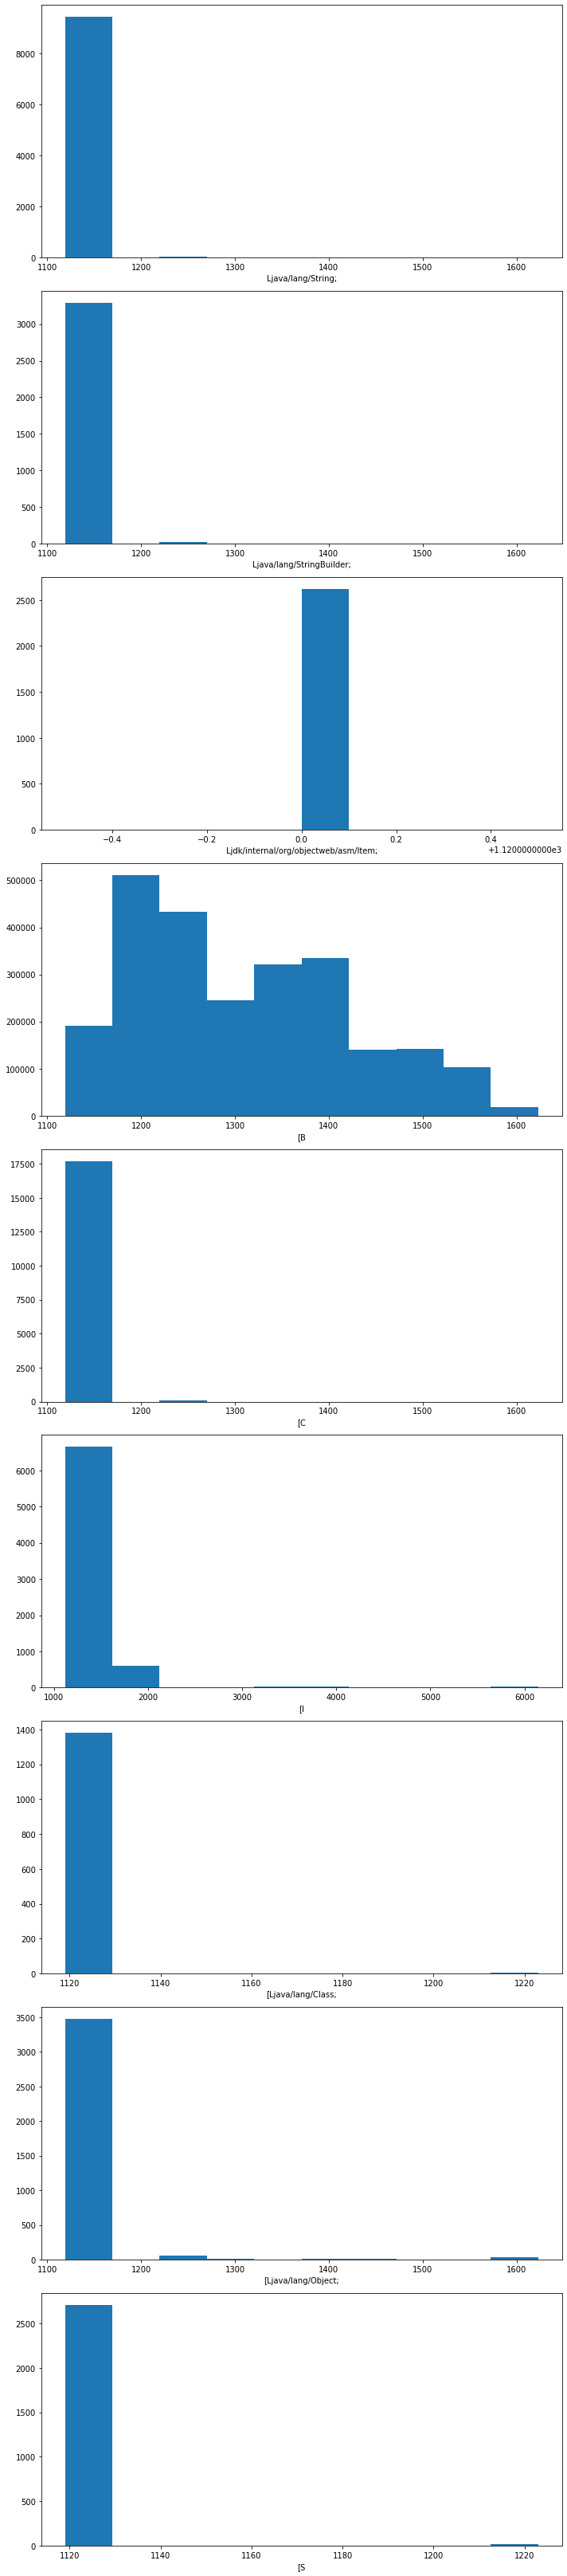

In [82]:
fig, axs = plt.subplots(num_types, 1, tight_layout=True, figsize=(10, 5 * num_types))

for name, ax in zip(types, axs):
    group = groups.get_group(name)
    # display(group)
    # print(name)
    
    ax.hist(group.lifetime)
    ax.set_xlabel(name)

## Average lifetime of each class

In [83]:
def plot_agg(which_agg: str):
    means = []
    print(f"getting {which_agg} of all types...")

    for name in types:
        group = groups.get_group(name)

        means.append(getattr(group.lifetime, which_agg)())

    plt.gcf().set_size_inches(15, num_types // 2)
    plt.barh([i for i in range(num_types)], means, tick_label=types)

    # scale x-axis between min and max lifetime
    minx = min(means)
    maxx = max(means)
    # show 5% extra on both sides
    delta = 0.05 * minx
    plt.xlim(minx - delta, maxx + delta)
    # plt.xticks(rotation=45)

getting mean of all types...


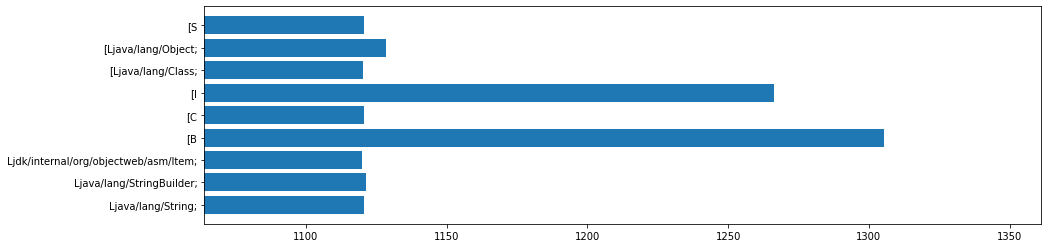

In [84]:
plot_agg("mean")

getting min of all types...


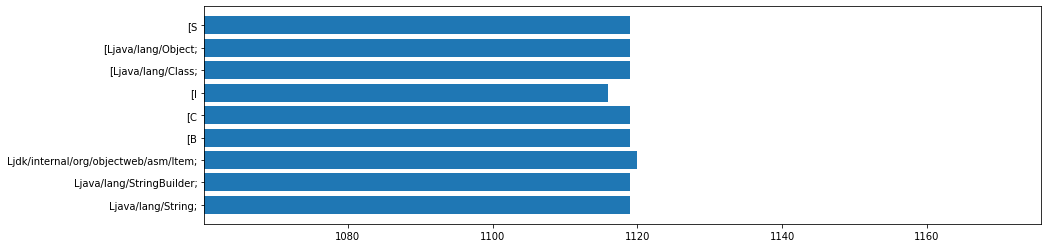

In [85]:
plot_agg("min")

getting max of all types...


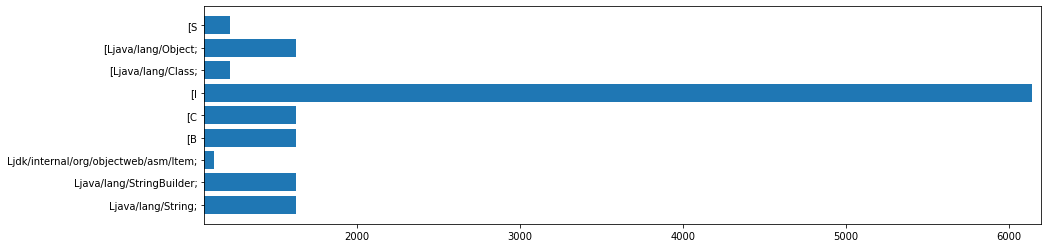

In [86]:
plot_agg("max")

## Average lifetime of each class grouped by allocation site

In [87]:
alloc_site_group_names, alloc_site_groups = get_groups(["type", "allocationSite"], num_objects_threshold)
num_names = len(alloc_site_group_names)

In [88]:
alloc_site_group_names

[('Ljava/lang/String;', 'java.lang.String.replace(CC)Ljava/lang/String;:114'),
 ('Ljava/lang/String;', 'java.lang.String.substring(II)Ljava/lang/String;:65'),
 ('Ljava/lang/String;',
  'java.lang.StringBuilder.toString()Ljava/lang/String;:0'),
 ('Ljdk/internal/org/objectweb/asm/Item;',
  'jdk.internal.org.objectweb.asm.ClassWriter.newUTF8(Ljava/lang/String;)I:37'),
 ('[B',
  'org.sample.BurstHeapMemoryAllocatorBenchmark.testMethod(Lorg/openjdk/jmh/infra/Blackhole;)V:68'),
 ('[B', 'sun.reflect.UTF8.encode(Ljava/lang/String;)[B:9'),
 ('[C', 'java.lang.AbstractStringBuilder.<init>(I)V:6'),
 ('[C', 'java.lang.String.replace(CC)Ljava/lang/String;:48'),
 ('[C', 'java.util.Arrays.copyOf([CI)[C:1'),
 ('[C', 'java.util.Arrays.copyOfRange([CII)[C:40'),
 ('[I', 'VM internal (Object filler):-1'),
 ('[I', 'VM internal:-1'),
 ('[Ljava/lang/Object;', 'VM internal:-1'),
 ('[S', 'VM internal:-1')]

In [89]:
def plot_aggs_alloc_site(which_agg: str):
    means = []
    print(f"getting {which_agg} of all types...")

    for name in alloc_site_group_names:
        group = alloc_site_groups.get_group(name)

        means.append(getattr(group.lifetime, which_agg)())

    plt.gcf().set_size_inches(15, num_names // 2)
    plt.barh([i for i in range(num_names)], means, tick_label=["-".join(i) for i in alloc_site_group_names])
    # scale x-axis between min and max lifetime
    minx = min(means)
    maxx = max(means)
    # show 5% extra on both sides
    delta = 0.05 * minx
    plt.xlim(minx - delta, maxx + delta)
    # plt.xticks(rotation=90)

getting mean of all types...


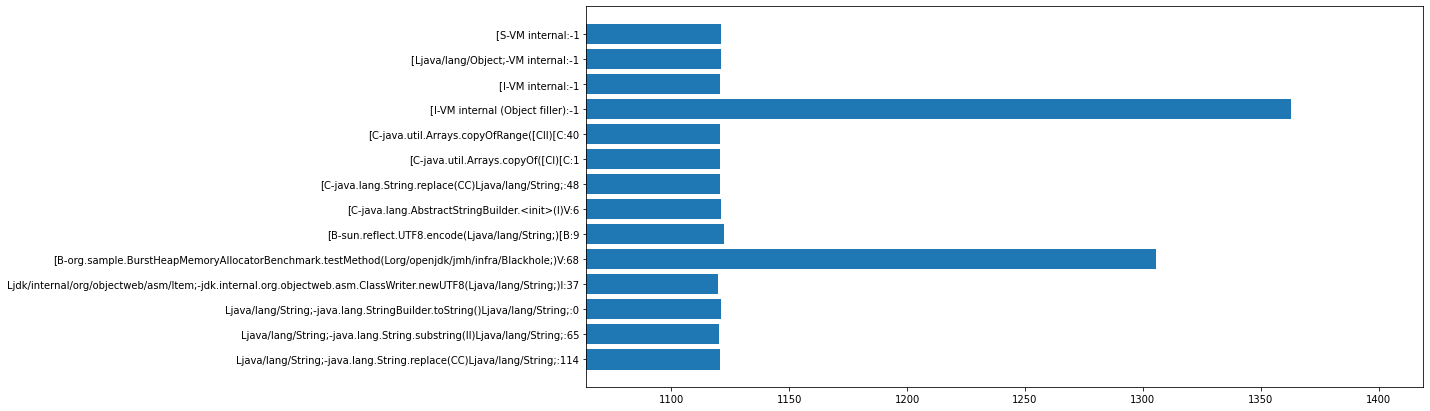

In [90]:
plot_aggs_alloc_site("mean")

getting min of all types...


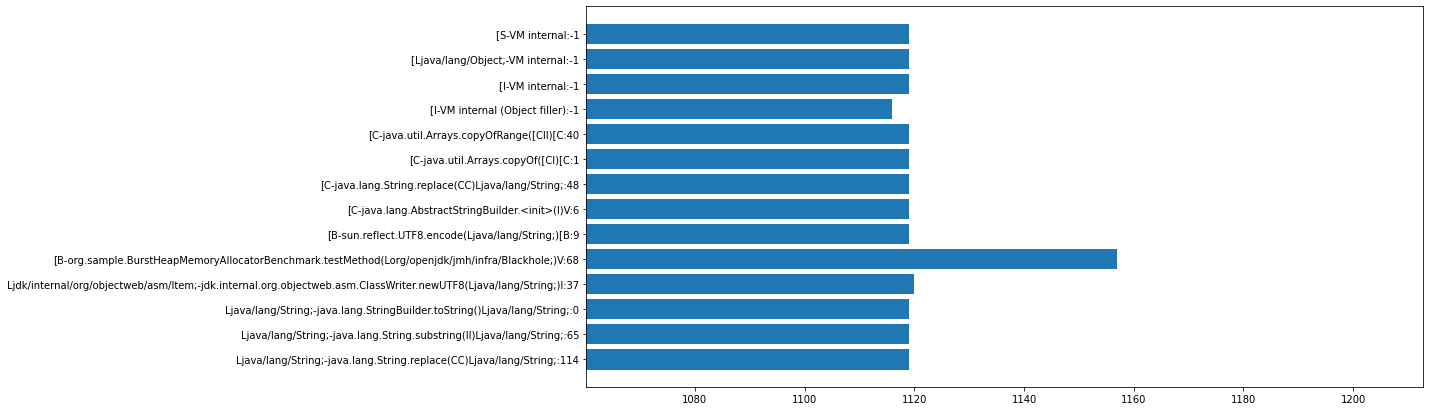

In [91]:
plot_aggs_alloc_site("min")

getting max of all types...


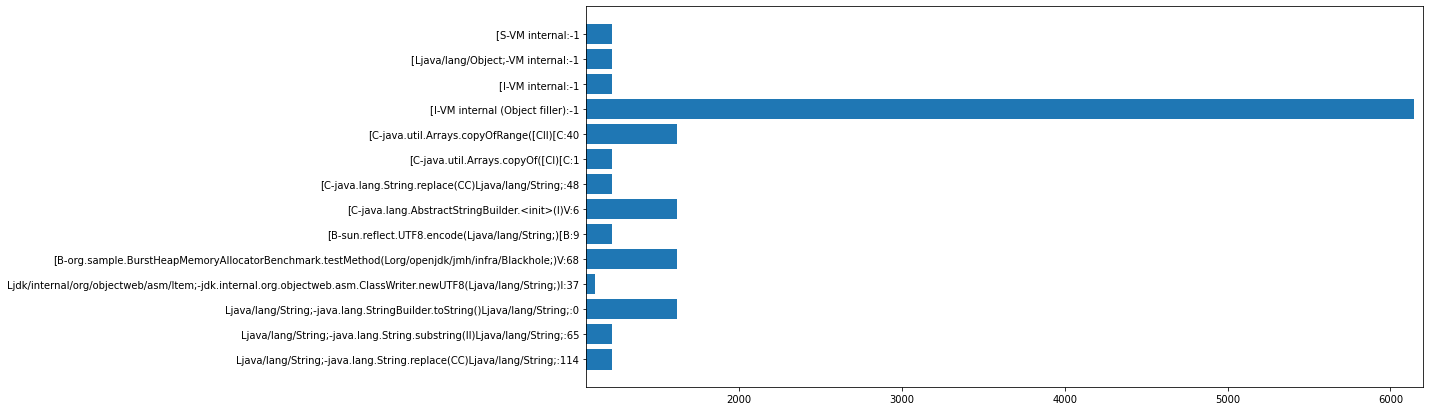

In [92]:
plot_aggs_alloc_site("max")